In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard





In [12]:
print(tf.__version__)

2.12.0


In [13]:
# Define the TensorBoard callback
log_dir = "/workspaces/CMPE258/logs/fit"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the training set into a training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

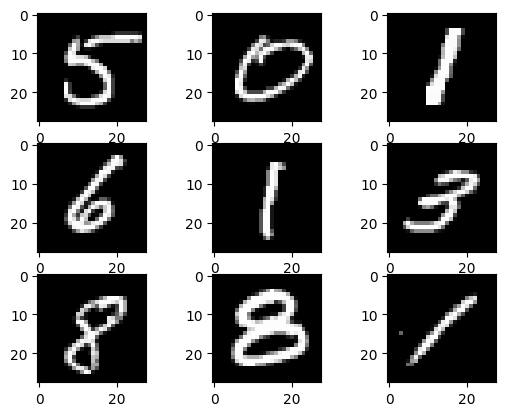

In [15]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

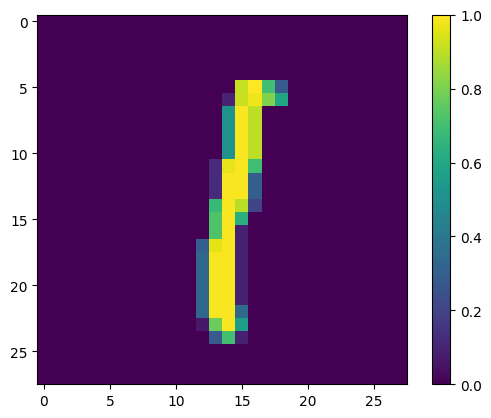

In [27]:
plt.figure()
plt.imshow(x_train[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
def crossvalidation(x_train, y_train, x_test, y_test, model):
    '''
    a function to perform cross-validation on the training set
    '''
    # Define the number of folds for cross-validation
    k = 5

    # Create the KFold object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    # Train the model using k-fold cross-validation
    fold = 0
    for train_index, val_index in kf.split(x_train):
        fold += 1
        print(f"Fold {fold}")
        x_train_fold = x_train[train_index]
        y_train_fold = y_train[train_index]
        x_val_fold = x_train[val_index]
        y_val_fold = y_train[val_index]
    
        # Fit the model to the current fold
        history = model.fit(x_train_fold, y_train_fold, validation_data=(x_val_fold, y_val_fold), epochs=5, batch_size=32, verbose=1)

        # Evaluate the model on the test data
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f"Test loss: {test_loss}")
        print(f"Test accuracy: {test_acc}")
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [18]:
# write a neural network model with 3 layers for MNIST dataset
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
# Step 3: Train the model on regular data
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_regular = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

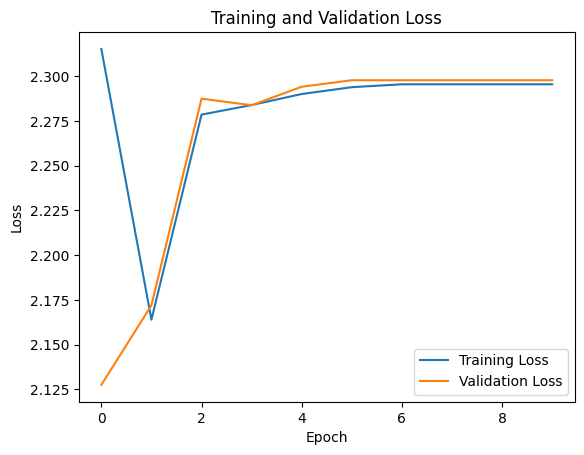

In [ ]:
# Plot the training and validation loss curves
plt.plot(history_regular.history['loss'], label='Training Loss')
plt.plot(history_regular.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Fold 1
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.2957 - accuracy: 0.4197 - val_loss: 2.2947 - val_accuracy: 0.4203
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.2955 - accuracy: 0.4207 - val_loss: 2.2942 - val_accuracy: 0.4218
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.2941 - accuracy: 0.4076 - val_loss: 2.3009 - val_accuracy: 0.3092
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3023 - accuracy: 0.3101 - val_loss: 2.3009 - val_accuracy: 0.3093
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3023 - accuracy: 0.3101 - val_loss: 2.3009 - val_accuracy: 0.3093
Test loss: 2.302360773086548
Test accuracy: 0.3037000000476837


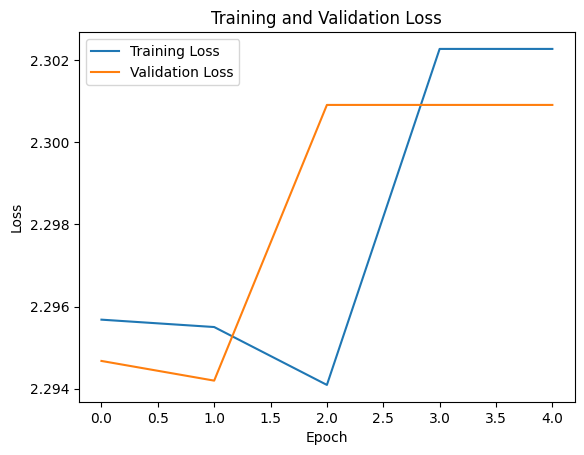

Fold 2
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3019 - accuracy: 0.3097 - val_loss: 2.3021 - val_accuracy: 0.3140
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3016 - accuracy: 0.3115 - val_loss: 2.3019 - val_accuracy: 0.3142
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3015 - accuracy: 0.3134 - val_loss: 2.3014 - val_accuracy: 0.3153
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3014 - accuracy: 0.3137 - val_loss: 2.3012 - val_accuracy: 0.3157
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3004 - accuracy: 0.2349 - val_loss: 2.3026 - val_accuracy: 0.2032
Test loss: 2.30259108543396
Test accuracy: 0.18950000405311584


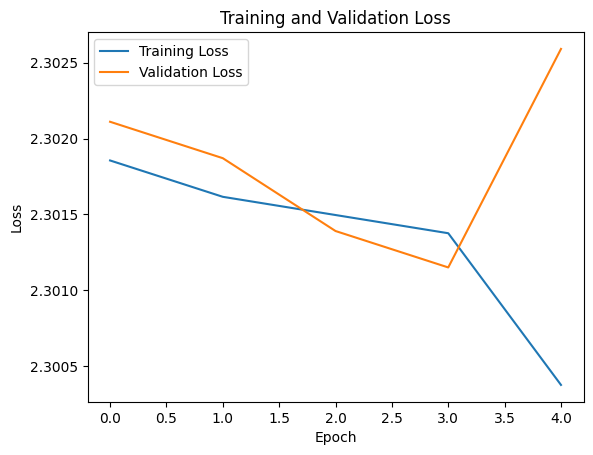

Fold 3
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3039 - accuracy: 0.2627 - val_loss: 2.3026 - val_accuracy: 0.2676
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3025 - accuracy: 0.2817 - val_loss: 2.3026 - val_accuracy: 0.3066
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3021 - accuracy: 0.2976 - val_loss: 2.3026 - val_accuracy: 0.1253
Epoch 4/5
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1251 - val_loss: 2.3026 - val_accuracy: 0.1253
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1251 - val_loss: 2.3026 - val_accuracy: 0.1253
Test loss: 2.30259108543396
Test accuracy: 0.12039999663829803


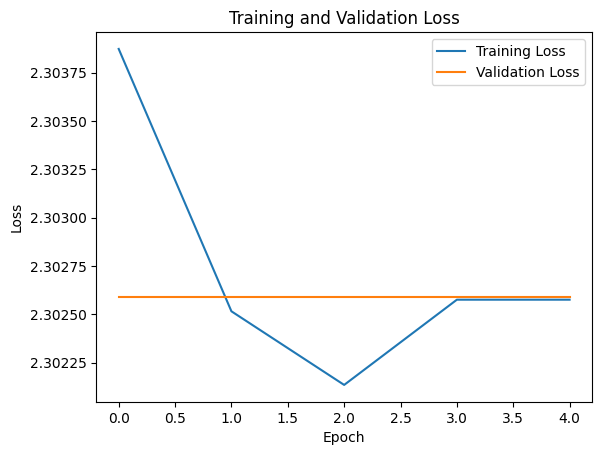

Fold 4
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1260 - val_loss: 2.3026 - val_accuracy: 0.1215
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1260 - val_loss: 2.3026 - val_accuracy: 0.1215
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1260 - val_loss: 2.3026 - val_accuracy: 0.1215
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1260 - val_loss: 2.3026 - val_accuracy: 0.1215
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1260 - val_loss: 2.3026 - val_accuracy: 0.1215
Test loss: 2.30259108543396
Test accuracy: 0.12039999663829803


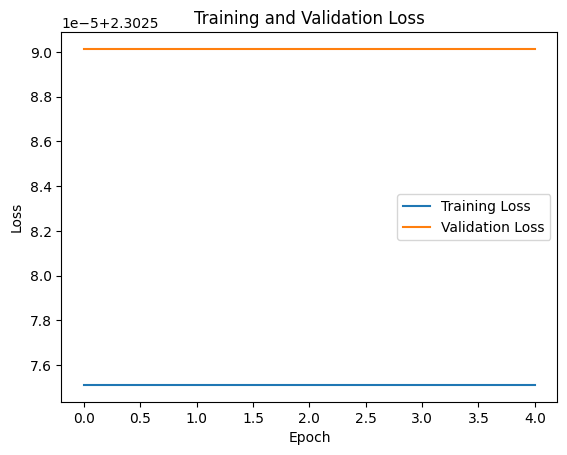

Fold 5
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1233 - val_loss: 2.3026 - val_accuracy: 0.1325
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1233 - val_loss: 2.3026 - val_accuracy: 0.1325
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1233 - val_loss: 2.3026 - val_accuracy: 0.1325
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1233 - val_loss: 2.3026 - val_accuracy: 0.1325
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1233 - val_loss: 2.3026 - val_accuracy: 0.1325
Test loss: 2.30259108543396
Test accuracy: 0.12039999663829803


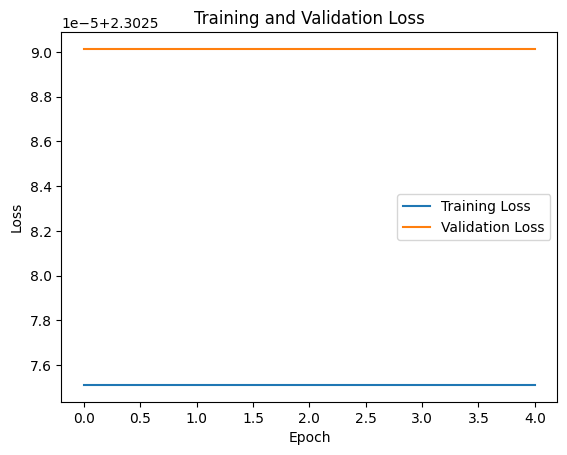

In [ ]:
# above graph clearly shows overfitting happening

# we are going to do cross validation on the training set and regular model

crossvalidation(x_train, y_train, x_test, y_test, model)

In [37]:
# we can see that the model is overfitting even after cross validation, we are going to do Data augmentation to reduce overfitting
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomBrightness(0.2),
])

In [21]:
# write a neural network model with 3 layers for data augmented MNIST dataset
model_augmented = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 2.2554 - accuracy: 0.1599 - val_loss: 2.2443 - val_accuracy: 0.1523
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2696 - accuracy: 0.1880 - val_loss: 2.2918 - val_accuracy: 0.2233
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2872 - accuracy: 0.1670 - val_loss: 2.2913 - val_accuracy: 0.1497
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2820 - accuracy: 0.1452 - val_loss: 2.3026 - val_accuracy: 0.1292
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1263 - val_loss: 2.3026 - val_accuracy: 0.1292
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1263 - val_loss: 2.3026 - val_accuracy: 0.1292
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.1264 - val_loss: 2.3026 - val_accuracy: 0.1293
Epoch 

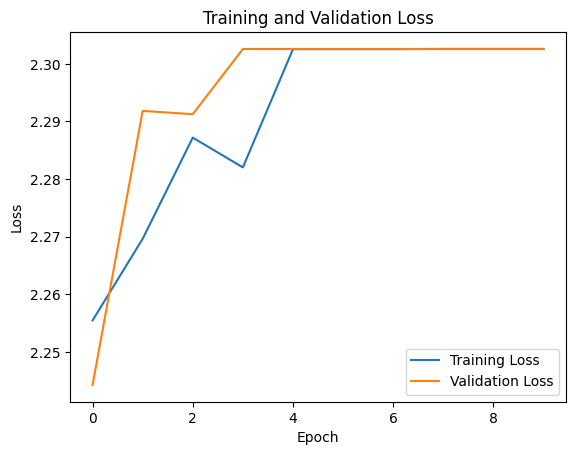

In [23]:
model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_augmented = model_augmented.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
# Plot the training and validation loss curves
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Fold 1
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1321 - val_loss: 2.3026 - val_accuracy: 0.1335
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1321 - val_loss: 2.3026 - val_accuracy: 0.1335
Epoch 3/5
1200/1200 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1321 - val_loss: 2.3026 - val_accuracy: 0.1335
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1321 - val_loss: 2.3026 - val_accuracy: 0.1335
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1321 - val_loss: 2.3026 - val_accuracy: 0.1335
Test loss: 2.30259108543396
Test accuracy: 0.13230000436306


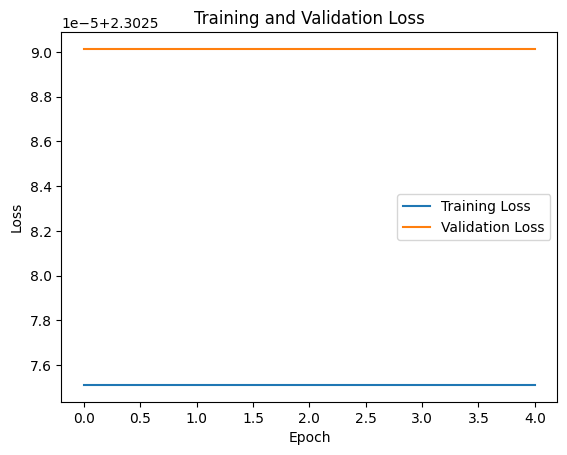

Fold 2
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1344 - val_loss: 2.3026 - val_accuracy: 0.1246
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1344 - val_loss: 2.3026 - val_accuracy: 0.1246
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1344 - val_loss: 2.3026 - val_accuracy: 0.1246
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1344 - val_loss: 2.3026 - val_accuracy: 0.1246
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1344 - val_loss: 2.3026 - val_accuracy: 0.1246
Test loss: 2.30259108543396
Test accuracy: 0.13230000436306


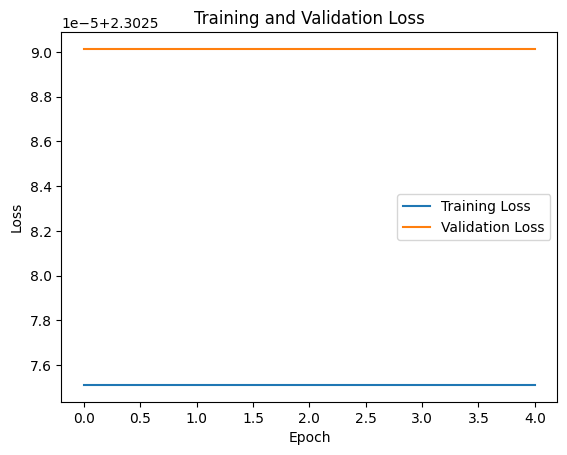

Fold 3
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1329 - val_loss: 2.3026 - val_accuracy: 0.1304
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1329 - val_loss: 2.3026 - val_accuracy: 0.1304
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1329 - val_loss: 2.3026 - val_accuracy: 0.1304
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1329 - val_loss: 2.3026 - val_accuracy: 0.1304
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1329 - val_loss: 2.3026 - val_accuracy: 0.1304
Test loss: 2.30259108543396
Test accuracy: 0.13230000436306


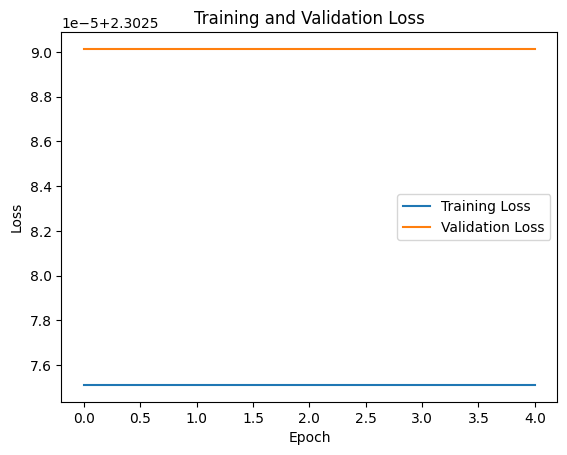

Fold 4
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Test loss: 2.30259108543396
Test accuracy: 0.13230000436306


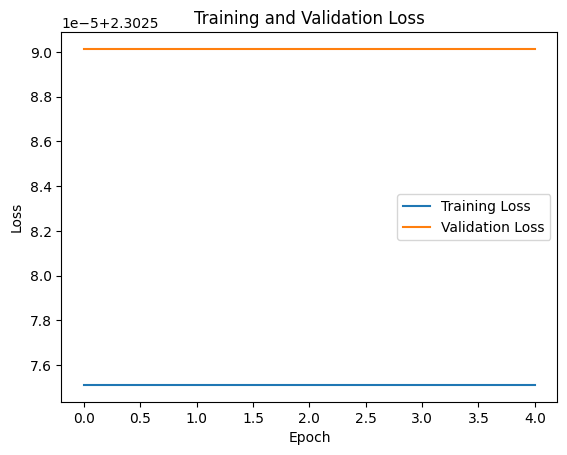

Fold 5
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1313 - val_loss: 2.3026 - val_accuracy: 0.1368
Test loss: 2.30259108543396
Test accuracy: 0.13230000436306


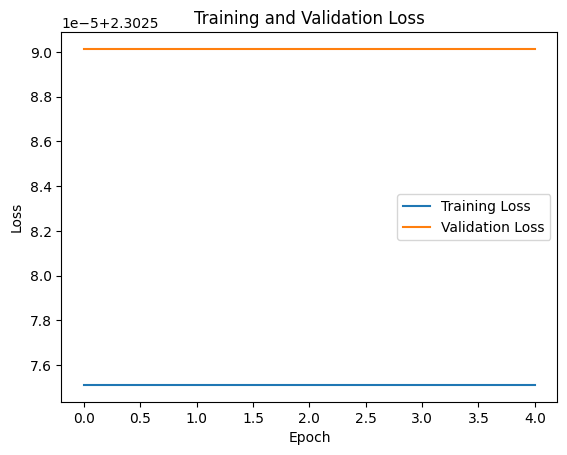

In [24]:
crossvalidation(x_train, y_train, x_test, y_test, model_augmented)

In [25]:
# Step 5: Compare the performance of the models on the validation set
score_regular = model.evaluate(x_val, y_val)
score_augmented = model_augmented.evaluate(x_val, y_val)

print("Regular model validation accuracy:", score_regular[1])
print("Augmented model validation accuracy:", score_augmented[1])

375/375 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1308
Regular model validation accuracy: 0.5070000290870667
Augmented model validation accuracy: 0.13083332777023315


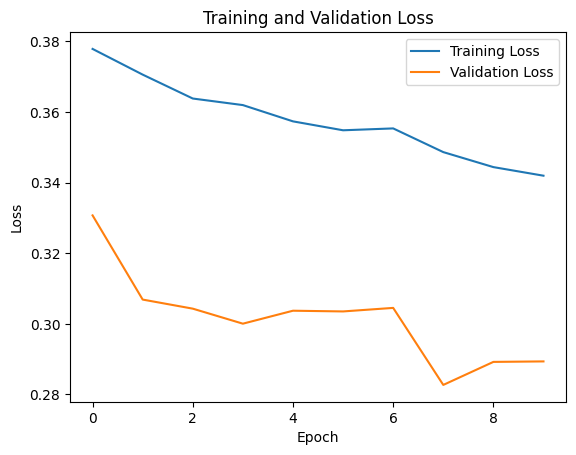

In [ ]:
# Plot the training and validation loss curves
plt.plot(history_regular.history['loss'], label='Training Loss')
plt.plot(history_regular.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_augmented = model_augmented.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 16s 40ms/step - loss: 0.3754 - accuracy: 0.9538 - val_loss: 0.3110 - val_accuracy: 0.9730
Epoch 2/10
375/375 [==============================] - 15s 39ms/step - loss: 0.3682 - accuracy: 0.9530 - val_loss: 0.3007 - val_accuracy: 0.9742
Epoch 3/10
375/375 [==============================] - 15s 40ms/step - loss: 0.3615 - accuracy: 0.9549 - val_loss: 0.3046 - val_accuracy: 0.9706
Epoch 4/10
375/375 [==============================] - 15s 39ms/step - loss: 0.3586 - accuracy: 0.9540 - val_loss: 0.2935 - val_accuracy: 0.9736
Epoch 5/10
375/375 [==============================] - 15s 39ms/step - loss: 0.3577 - accuracy: 0.9545 - val_loss: 0.3052 - val_accuracy: 0.9717
Epoch 6/10
375/375 [==============================] - 15s 40ms/step - loss: 0.3530 - accuracy: 0.9549 - val_loss: 0.2951 - val_accuracy: 0.9747
Epoch 7/10
375/375 [==============================] - 16s 41ms/step - loss: 0.3507 - accuracy: 0.9559 - val_loss: 0.2953 - val_accuracy:

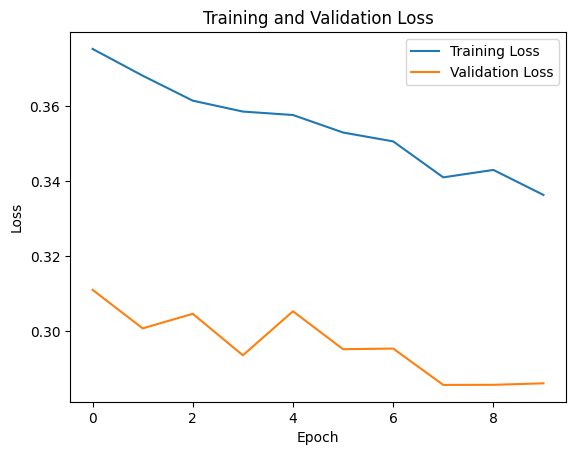

In [22]:
# Plot the training and validation loss curves
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Step 5: Compare the performance of the models on the validation set
score_regular = model.evaluate(x_val, y_val)
score_augmented = model_augmented.evaluate(x_val, y_val)

print("Regular model validation accuracy:", score_regular[1])
print("Augmented model validation accuracy:", score_augmented[1])

375/375 [==============================] - 1s 4ms/step - loss: 0.3144 - accuracy: 0.9728
Regular model validation accuracy: 0.9710000157356262
Augmented model validation accuracy: 0.9727500081062317


In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fold 1
Epoch 1/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3426 - accuracy: 0.1532 - val_loss: 2.3026 - val_accuracy: 0.1822
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1839 - val_loss: 2.3026 - val_accuracy: 0.1822
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1839 - val_loss: 2.3026 - val_accuracy: 0.1822
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1839 - val_loss: 2.3026 - val_accuracy: 0.1822
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1839 - val_loss: 2.3026 - val_accuracy: 0.1822
Test loss: 2.30259108543396
Test accuracy: 0.18320000171661377


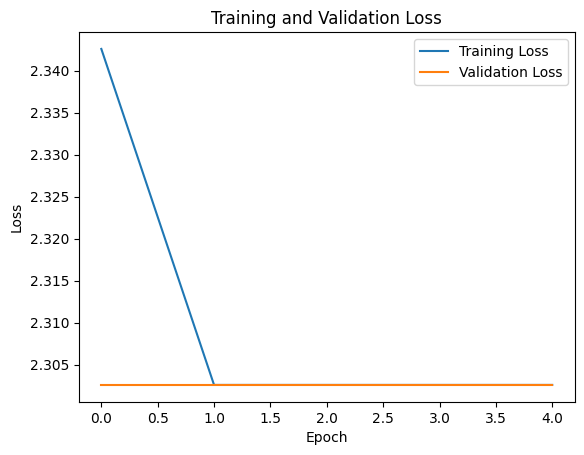

Fold 2
Epoch 1/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1841 - val_loss: 2.3026 - val_accuracy: 0.1815
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1841 - val_loss: 2.3026 - val_accuracy: 0.1815
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1841 - val_loss: 2.3026 - val_accuracy: 0.1815
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1841 - val_loss: 2.3026 - val_accuracy: 0.1815
Epoch 5/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1841 - val_loss: 2.3026 - val_accuracy: 0.1815
Test loss: 2.30259108543396
Test accuracy: 0.18320000171661377


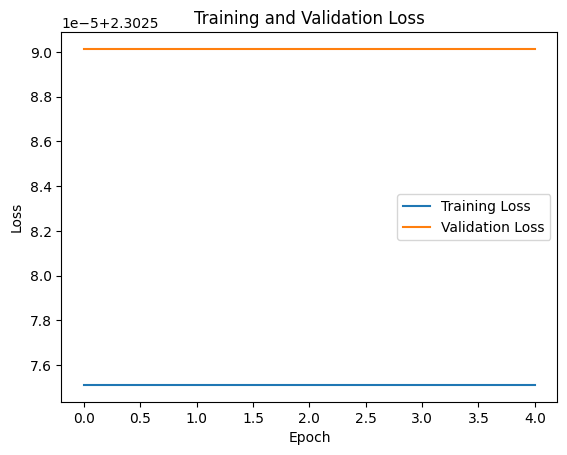

Fold 3
Epoch 1/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1843 - val_loss: 2.3026 - val_accuracy: 0.1806
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1843 - val_loss: 2.3026 - val_accuracy: 0.1806
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1843 - val_loss: 2.3026 - val_accuracy: 0.1806
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1843 - val_loss: 2.3026 - val_accuracy: 0.1806
Epoch 5/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1843 - val_loss: 2.3026 - val_accuracy: 0.1806
Test loss: 2.30259108543396
Test accuracy: 0.18320000171661377


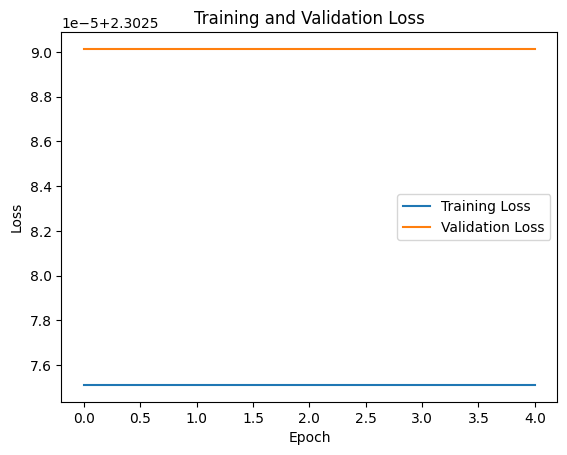

Fold 4
Epoch 1/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1838 - val_loss: 2.3026 - val_accuracy: 0.1828
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1838 - val_loss: 2.3026 - val_accuracy: 0.1828
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1838 - val_loss: 2.3026 - val_accuracy: 0.1828
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1838 - val_loss: 2.3026 - val_accuracy: 0.1828
Epoch 5/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1838 - val_loss: 2.3026 - val_accuracy: 0.1828
Test loss: 2.30259108543396
Test accuracy: 0.18320000171661377


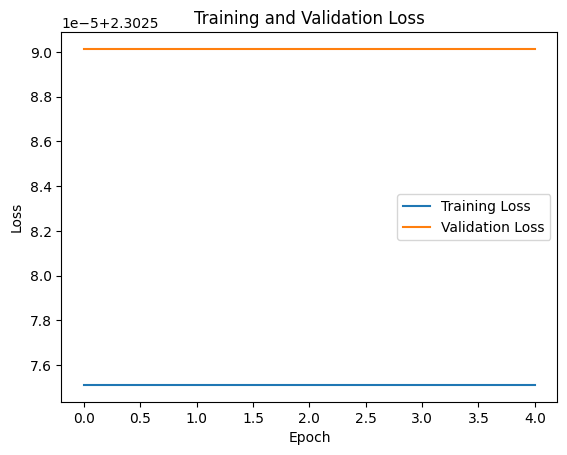

Fold 5
Epoch 1/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1818 - val_loss: 2.3026 - val_accuracy: 0.1907
Epoch 2/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1818 - val_loss: 2.3026 - val_accuracy: 0.1907
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1818 - val_loss: 2.3026 - val_accuracy: 0.1907
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1818 - val_loss: 2.3026 - val_accuracy: 0.1907
Epoch 5/5
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1818 - val_loss: 2.3026 - val_accuracy: 0.1907
Test loss: 2.30259108543396
Test accuracy: 0.18320000171661377


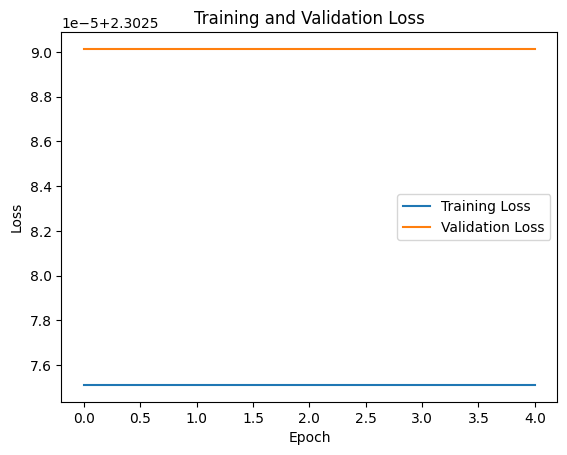

In [30]:
crossvalidation(x_train, y_train, x_test, y_test, model)

In [38]:
model_augmented = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(10)
])
model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fold 1
Epoch 1/5
1200/1200 [==============================] - 8s 5ms/step - loss: 7.1271 - accuracy: 0.1046 - val_loss: 7.3274 - val_accuracy: 0.1065
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 4.9770 - accuracy: 0.1026 - val_loss: 6.8366 - val_accuracy: 0.1063
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 4.6397 - accuracy: 0.1004 - val_loss: 6.5617 - val_accuracy: 0.1479
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 5.9613 - accuracy: 0.1020 - val_loss: 11.2610 - val_accuracy: 0.0879
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 7.9798 - accuracy: 0.0981 - val_loss: 12.7367 - val_accuracy: 0.1001
Test loss: 12.800844192504883
Test accuracy: 0.0982000008225441


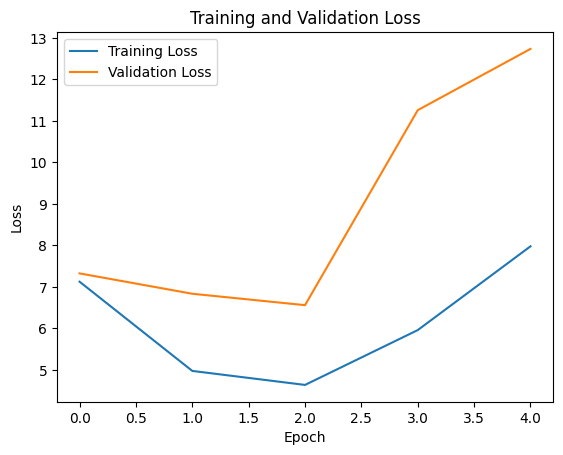

Fold 2
Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 6.7528 - accuracy: 0.0970 - val_loss: 6.8262 - val_accuracy: 0.1023
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 4.9865 - accuracy: 0.0978 - val_loss: 6.4039 - val_accuracy: 0.1023
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 5.2731 - accuracy: 0.0984 - val_loss: 7.4494 - val_accuracy: 0.1023
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 5.1430 - accuracy: 0.0975 - val_loss: 7.1075 - val_accuracy: 0.1023
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 5.1055 - accuracy: 0.0992 - val_loss: 7.3701 - val_accuracy: 0.1004
Test loss: 7.259611129760742
Test accuracy: 0.10320000350475311


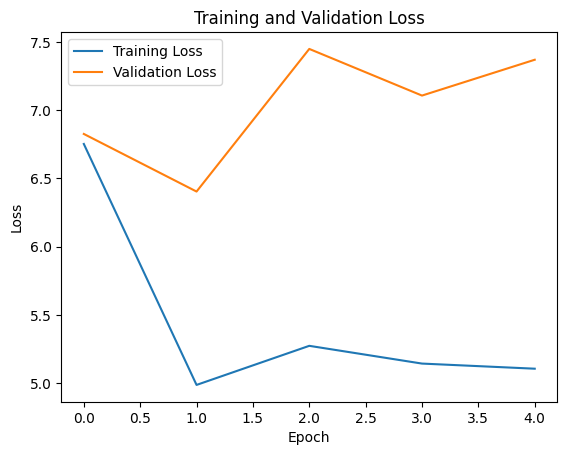

Fold 3
Epoch 1/5
1200/1200 [==============================] - 5s 5ms/step - loss: 4.9318 - accuracy: 0.1072 - val_loss: 5.4634 - val_accuracy: 0.1030
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 4.6165 - accuracy: 0.0998 - val_loss: 7.4401 - val_accuracy: 0.0933
Epoch 3/5
  50/1200 [>.............................] - ETA: 4s - loss: 5.3383 - accuracy: 0.0956

Bad pipe message: %s [b'\x06\xba:$\xc0\xed\x8e\xc0\xb7<\x95\xe4\x9a\x15\x80\xbf\x99\xcc \xb5}\xafIWZk\xe3\xc3`\x99\x1e\xf5\x0f\xc9\xd1}\x0foP2\xa1{\xcc2\xd6\xcc\xd6\xcd\xd3\xbd\x98\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05', b'\x04\x01\x05\x01\x06\x01\x00']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 M\x94\xaeRk\n\xb1\x96p\x15\x8cj\xc1F.\xa0)&\xa7\x08\x1a\x9a']
Bad pipe message: %s [b"\xff\xa4M\xaf\xa8\xdf\xe7\xb8\xe4\x80\xbbZ\xbf\xaf\xc6\x82\xdb\xfe\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00

1200/1200 [==============================] - 5s 4ms/step - loss: 4.9435 - accuracy: 0.0976 - val_loss: 6.5785 - val_accuracy: 0.1309
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 5.1104 - accuracy: 0.1061 - val_loss: 7.1768 - val_accuracy: 0.1118
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 4.9254 - accuracy: 0.1060 - val_loss: 6.9558 - val_accuracy: 0.1118
Test loss: 6.8628458976745605
Test accuracy: 0.11349999904632568


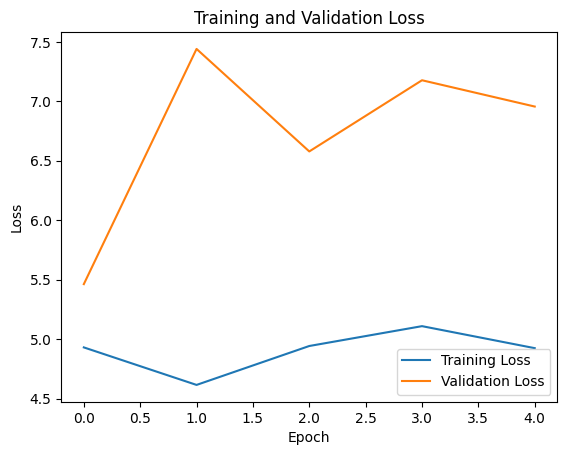

Fold 4
Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 5.8063 - accuracy: 0.1010 - val_loss: 11.5785 - val_accuracy: 0.0952
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 6.4628 - accuracy: 0.0978 - val_loss: 2.3635 - val_accuracy: 0.1356
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 6.4217 - accuracy: 0.1021 - val_loss: 3.8844 - val_accuracy: 0.1015
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 3.7399 - accuracy: 0.1031 - val_loss: 3.6337 - val_accuracy: 0.1015
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 3.5688 - accuracy: 0.1027 - val_loss: 3.5166 - val_accuracy: 0.1015
Test loss: 3.516590118408203
Test accuracy: 0.10279999673366547


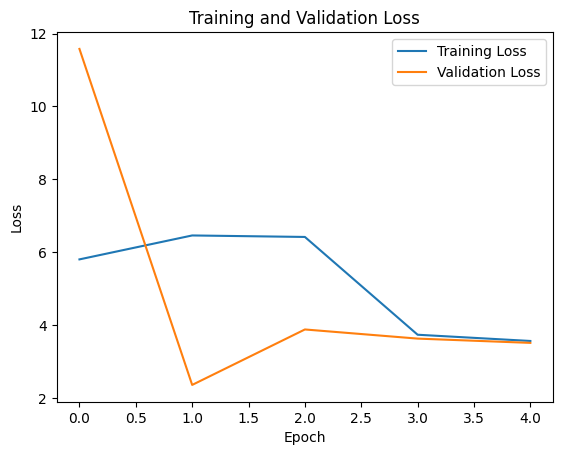

Fold 5
Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 3.4725 - accuracy: 0.0998 - val_loss: 3.4289 - val_accuracy: 0.1021
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 3.3933 - accuracy: 0.0995 - val_loss: 3.3704 - val_accuracy: 0.1021
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 3.3622 - accuracy: 0.1006 - val_loss: 3.3522 - val_accuracy: 0.1021
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 3.3376 - accuracy: 0.1009 - val_loss: 3.3200 - val_accuracy: 0.1021
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 3.2950 - accuracy: 0.1008 - val_loss: 3.2646 - val_accuracy: 0.1021
Test loss: 3.264634132385254
Test accuracy: 0.10279999673366547


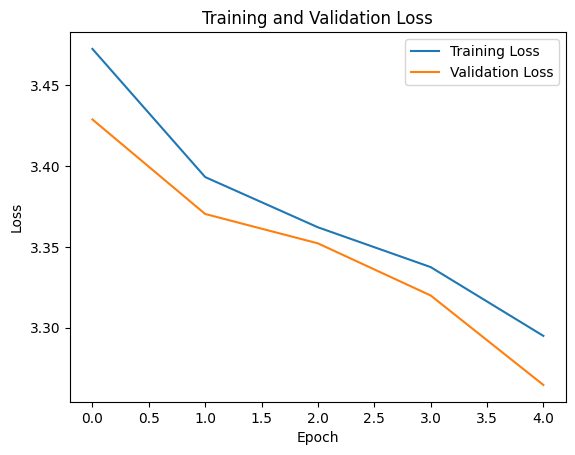

In [39]:
crossvalidation(x_train, y_train, x_test, y_test, model_augmented)